# **GROUP 8 - Solutions to P02**

**Students:**
- Marek Majoch, <s13mmajo@uni-bonn.de>, M.Sc Astrophysics
- Yanhanle Lauryn Zhao, <s19yzhao@uni-bonn.de>, M.Sc Astrophysics
- Diana Victoria Lopez Navarro, <s09dlope@uni-bonn.de>, M.Sc Astrophysics

**Deadline:** 24. Oct 2024, 13:00 
_______________________________________________________


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

## Problem 1: The Gaussian distribution

Let us assume, we measure two quantities $y_1, y_2$ at locations $x_1, x_2$. We know that our observations are independent and each follows a Gaussian distribution with means $\mu_1, \mu_2$ and standard deviations $\sigma_1, \sigma_2$, i.e. $$P(y_1)=\frac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}},$$ and $$P(y_2)=\frac{1}{\sqrt{2\pi}\sigma_2}e^{-\frac{(y_2-\mu_2)^2}{2\sigma_2^2}}.$$ We have that $\mu_1=0, \mu_2=2, \sigma_1=0.5, \sigma_2=2$, and the setup is illustrated in the plot below.

- (i) What is the joint distribution $𝑃(𝑦_1,𝑦_2)$ of $𝑦_1,𝑦_2$? Write down its analytical form.

**Solution**:

Since the observation from $y_1, y_2$ are independent, then,
$$P(y_1,y_2)=P(y_1) \cdot P(y_2)$$
$$P(y_1,y_2)=\frac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}} \cdot \frac{1}{\sqrt{2\pi}\sigma_2}e^{-\frac{(y_2-\mu_2)^2}{2\sigma_2^2}}$$


Finally, we acquire:
$$P(y_1,y_2)= \frac{1}{2\pi \sigma_1 \sigma_2}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}-\frac{(y_2-\mu_2)^2}{2\sigma_2^2}}  $$

- (ii) Use `numpy` to draw $n$ samples of $y^i_1, y^i_2$ from this distribution. You can start with $n=100$ and see what happens if you increase $n$.


In [73]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous

names =['Y1','Y2']
n=[100, 1000, 10000, 100000] #number of samples
u=[0,2] # mean
sigma=[[0.25,0],[0,4]] # Covariance matrix 
# because the variables y1 and 2 are not correlated, the 
# covariance matrix is diagonal with elements (sigma_i)^2

In [74]:
#drawing the samples
def sampling(u,sigma,n):
    samples = np.random.multivariate_normal(u, sigma, n)
    return samples

def plotting(function,n):
    fig, axh = plt.subplots(ncols=2, figsize=(12, 3))
    axh[0].hist(function[:, 0], bins=100, color ='b',  alpha=0.7, range=(-8,8))
    axh[0].set_title(str(names[0])+' , n=%i' %n)
    axh[0].set_xlabel('Position')
    axh[0].set_ylabel('Frequency')

    axh[1].hist(function[:, 1], bins=100, color ='b', alpha=0.7, range=(-8,8))
    axh[1].set_title(str(names[1])+' , n=%i' %n)
    axh[1].set_xlabel('Position')
    axh[1].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

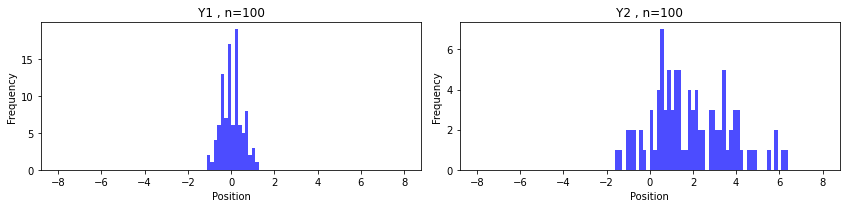

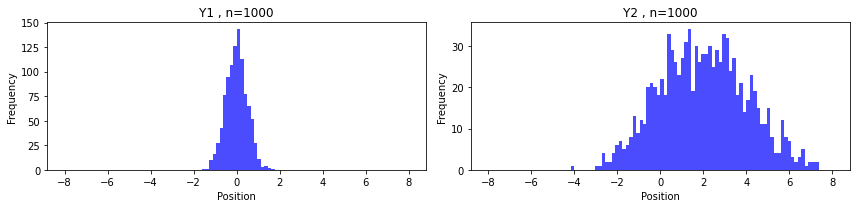

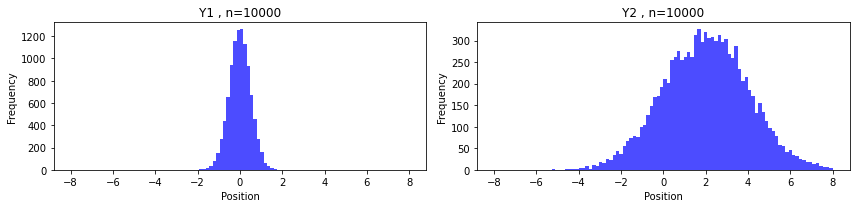

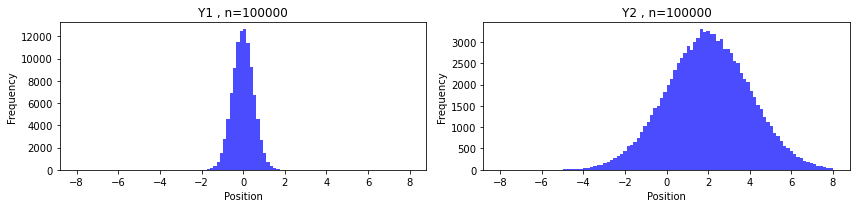

In [75]:
#Plots
for i in n:
    sample=plotting(sampling(u,sigma,i), i)

As we can see, with increased size of sampling, histograms represent smoother and more visible characteristic "bell curve".
Also, given the different variance ($\sigma_1=0.5, \sigma_2=2$) graphs of $y_2$ with the $\sigma_2$ are much wider and with non-zero mean ($\mu_2=2$), graphs of $y_2$ are shifted in position towards that value, as expected.

- (iii) Use `matplotlib` to plot histograms of the samples. In particular, plot both the 2D histogram for $y_1, y_2$, as well as the two 1D histograms for $y_1$ and $y_2$.

Marginal plots:

In [76]:
kappa=sampling(u,sigma,n[3])

In [77]:
def plot2D(function,u_top,u_right,sigma_top, sigma_right):
    # Create the main figure and axes
    fig = plt.figure(figsize=(10, 8))
    gs = fig.add_gridspec(3, 3)
    ax_main = fig.add_subplot(gs[1:, :-1])
    ax_right = fig.add_subplot(gs[1:, -1], sharey=ax_main)
    ax_top = fig.add_subplot(gs[0, :-1], sharex=ax_main)

    # Create the 2D histogram
    hist, x_edges, y_edges, im = ax_main.hist2d(function[:, 0], function[:, 1], bins=50, cmap='jet')
    ax_main.axvline(x=u_top, linestyle='--', color='w', alpha=0.8 , label='$\mu$')    
    ax_main.axvline(x=u_top+sigma_top, linestyle=':', color='w', alpha=0.8)   
    ax_main.axvline(x=u_top-sigma_top, linestyle=':', color='w', alpha=0.8, label='$\mu \pm \sigma$')
    ax_main.axhline(y=u_right, linestyle='--', color='w', alpha=0.8, label='$\mu$')
    ax_main.axhline(y=u_right+sigma_right, linestyle=':', color='w', alpha=0.8, label='$\mu \pm \sigma$')   
    ax_main.axhline(y=u_right-sigma_right, linestyle=':', color='w', alpha=0.8) 
    
    fig.colorbar(im, ax=ax_main, label='Count')

    # Create the marginal histograms
    ax_top.hist(function[:, 0], bins=50, color='skyblue', label=str(names[0]))
    ax_top.axvline(x=u_top, linestyle='--', color='black', alpha=0.5 , label='$\mu$')    
    ax_top.axvline(x=u_top+sigma_top, linestyle=':', color='black', alpha=0.5)   
    ax_top.axvline(x=u_top-sigma_top, linestyle=':', color='black', alpha=0.5, label='$\mu \pm \sigma$')


    ax_right.hist(function[:, 1], bins=50, orientation='horizontal', color='skyblue', label=str(names[1]))
    ax_right.axhline(y=u_right, linestyle='--', color='black', alpha=0.5, label='$\mu$')
    ax_right.axhline(y=u_right+sigma_right, linestyle=':', color='black', alpha=0.5, label='$\mu \pm \sigma$')   
    ax_right.axhline(y=u_right-sigma_right, linestyle=':', color='black', alpha=0.5) 
    
    # Ticks from marginal histograms
    ax_top.tick_params(axis="x", labelbottom=True)
    ax_right.tick_params(axis="y", labelleft=True)

    # Set labels and title
    ax_main.set_xlabel(str(names[0]) +' axis')
    ax_main.set_ylabel(str(names[1])+' axis')
    ax_main.set_title('2D Histogram with Marginal Histograms')
    ax_right.legend()
    ax_top.legend()
    plt.tight_layout()
    plt.show()


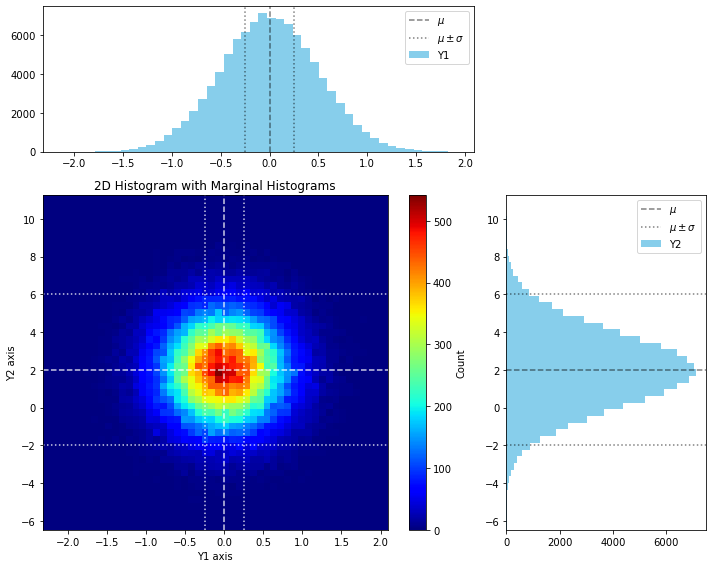

In [78]:
plot2D(kappa,u[0],u[1],sigma[0][0],sigma[1][1])

(iv) Use `matplotlib` to obtain a contour plot from the 2D samples. Overplot it on your 2D historgram and compare.

In [81]:
def plot2D_andContour(function,u_top,u_right,sigma_top, sigma_right):
    # Create the main figure and axes
    fig = plt.figure(figsize=(10, 8))
    gs = fig.add_gridspec(3, 3)
    ax_main = fig.add_subplot(gs[1:, :-1])
    ax_right = fig.add_subplot(gs[1:, -1], sharey=ax_main)
    ax_top = fig.add_subplot(gs[0, :-1], sharex=ax_main)

    # Create the 2D histogram
    hist, x_edges, y_edges, im = ax_main.hist2d(function[:, 0], function[:, 1], bins=50, cmap='jet')
    ax_main.axvline(x=u_top, linestyle='--', color='w', alpha=0.8 , label='$\mu$')    
    ax_main.axvline(x=u_top+sigma_top, linestyle=':', color='w', alpha=0.8)   
    ax_main.axvline(x=u_top-sigma_top, linestyle=':', color='w', alpha=0.8, label='$\mu \pm \sigma$')
    ax_main.axhline(y=u_right, linestyle='--', color='w', alpha=0.8, label='$\mu$')
    ax_main.axhline(y=u_right+sigma_right, linestyle=':', color='w', alpha=0.8, label='$\mu \pm \sigma$')   
    ax_main.axhline(y=u_right-sigma_right, linestyle=':', color='w', alpha=0.8) 
    fig.colorbar(im, ax=ax_main, label='Count')

    # Create the marginal histograms
    ax_top.hist(function[:, 0], bins=50, color='skyblue', label=str(names[0]))
    ax_top.axvline(x=u_top, linestyle='--', color='black', alpha=0.5 , label='$\mu$')    
    ax_top.axvline(x=u_top+sigma_top, linestyle=':', color='black', alpha=0.5)   
    ax_top.axvline(x=u_top-sigma_top, linestyle=':', color='black', alpha=0.5, label='$\mu \pm \sigma$')

    ax_right.hist(function[:, 1], bins=50, orientation='horizontal', color='skyblue', label=str(names[1]))
    ax_right.axhline(y=u_right, linestyle='--', color='black', alpha=0.5, label='$\mu$')
    ax_right.axhline(y=u_right+sigma_right, linestyle=':', color='black', alpha=0.5, label='$\mu \pm \sigma$')   
    ax_right.axhline(y=u_right-sigma_right, linestyle=':', color='black', alpha=0.5) 
    
    # Ticks from marginal histograms
    ax_top.tick_params(axis="x", labelbottom=True)
    ax_right.tick_params(axis="y", labelleft=True)

    #contours
    X, Y = np.meshgrid(x_edges[:-1], y_edges[:-1])
    contour = ax_main.contour(X, Y, hist.T, levels=10, colors='white', linewidths=1.5)  
    ax_main.clabel(contour, inline=True, fontsize=8)
    ax_main.set_aspect('auto')
    
    # Set labels and title
    ax_main.set_xlabel(str(names[0]) +' axis')
    ax_main.set_ylabel(str(names[1])+' axis')
    ax_main.set_title('2D Histogram with Marginal Histograms + Countours')
    ax_right.legend()
    ax_top.legend()
    plt.tight_layout()
    plt.show()


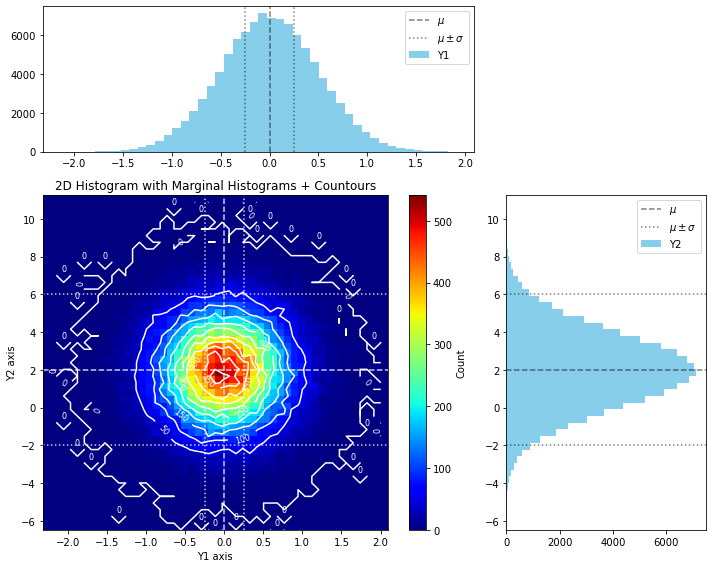

In [83]:
plot2D_andContour(kappa,u[0],u[1],sigma[0][0],sigma[1][1])

#Explain

- (v) Derive an analytic expectation for the 1D histograms of $y_1$ and $y_2$ (what distribution are you plotting in this case?). Compare to your findings above. 

Suppose n samples of $y_1$ are $y_1^1, y_1^2, ..., y_1^n$, then expectation value of $y_1$ samples is 
$$\langle y_1 \rangle = \langle \frac{1}{n}\sum_{i=1}^n y_1^i \rangle = \frac{1}{n}\sum_{i=1}^n \langle y_1^i \rangle$$

since each sample of $y_1^i$ is drew from distribution $P(y_1)=\frac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}}$, where $\mu_1=0$, $\sigma_1$=0.5, 

then expectation of each sample $y_1^i$: $\langle y_1^i \rangle$ = $\mu_1$ = 0

Therefore, expectation of n samples of $y_1$ is $$\langle y_1 \rangle = \frac{1}{n}\sum_{i=1}^n \langle y_1^i \rangle = \frac{1}{n}\sum_{i=1}^n \mu_1 = 0 $$

Similarly, for n samples of $y_2$ $y_2^1, y_2^2, ..., y_2^n$, expectation of $y_2$ samples is 
$$\langle y_2 \rangle =  \frac{1}{n}\sum_{i=1}^n \mu_2 = \frac{1}{n} \cdot 2n = 2 $$

In [93]:
# expectation of y1 and y2 samples
np.nanmean(kappa[:, 0]), np.nanmean(kappa[:, 1])

(-0.0003149466083832617, 1.9981291807831394)

Values of expectation computed above from $y_1, y_2$ samples is close to the analytical expectation value $\langle y_1 \rangle =0, \langle y_2 \rangle = 2$.

------------------------------------------------

- (vi) Let us now assume that we are actually not interested in $y_1, y_2$ but in a linear transformation of these variables, $z_1, z_2$ defined as $$\boldsymbol{z}=A\boldsymbol{y},$$ where $$A=\begin{pmatrix}
1 & 0.2  \\
0.2 & 1 
\end{pmatrix}.$$ Using these new samples, repeat problems (i) to (v). What has changed compared to before? 

**Hint:** For (v) you can use the analytic expression for the 2D Gaussian we have discussed in class, i.e. $$\mathcal{N}(\boldsymbol{y}) = \frac{1}{\sqrt{(2\pi)^2|C|}}e^{-\frac{1}{2}(\boldsymbol{y}-\boldsymbol{\mu})^TC^{-1}(\boldsymbol{y}-\boldsymbol{\mu})},$$ with $$C = \begin{pmatrix}
\sigma^2_1 & r\sigma_1\sigma_2  \\
r\sigma_1\sigma_2 & \sigma^2_2 
\end{pmatrix}.$$

(i) What is the joint distribution $P(z_1, z_2)$ of $z_1, z_2$? Write down its analytical form.

With $\boldsymbol{z}=A\boldsymbol{y},$ where $A=\begin{pmatrix}
1 & 0.2  \\
0.2 & 1 
\end{pmatrix},$ $$ z_1 = y_1 + 0.2 y_2, \\ z_2 = 0.2 y_1 + y_2 .$$

Then with $\mu_1=0, \mu_2=2, \sigma_1=0.5, \sigma_2=2$,
$$\mu_{z_1} = \langle z_1 \rangle = \langle y_1 + 0.2 y_2 \rangle = \langle y_1 \rangle + 0.2 \langle y_2 \rangle = 0.4$$
$$\mu_{z_2} = \langle z_2 \rangle = \langle 0.2 y_1 + y_2 \rangle = 0.2\langle y_1 \rangle + \langle y_2 \rangle = 2$$ 


$$\sigma_{z_1} = \langle (z_1-\mu_{z_1})^2 \rangle = \langle (y_1+0.2y_2-0.4)^2 \rangle = \sigma_{y_1}^2+0.2^2\sigma_{y_2}^2+0.4\langle y_1y_2\rangle = 0.41$$
$$\sigma_{z_2} = \langle (z_2-\mu_{z_2})^2 \rangle = \langle (0.2y_1+y_2-2)^2 \rangle = 0.2^2\sigma_{y_1}^2+\sigma_{y_2}^2+0.4\langle y_1y_2\rangle = 4.01$$

**Covariance**

Using: 
\begin{equation*}
Cov( X+aY,Z+bW) \ =\ Cov( X,Z) \ +aCov( X,W) \ +bCov( Y,Z) \ +ab
\end{equation*}

We find:
\begin{align*}
Cov( z_{1} ,\ z_{2}) & =Cov(y_1+0.2y_2, 0.2y_1+y_2) \\
 & =\  0.2Cov(y_1,y_1)+Cov(y_1,y_2)+0.2\cdot 0.2Cov(y_2,y_1)+0.2Cov(y_2,y_2)\\
 & =\ 0.85 \\
\end{align*}


In Summary, we have: 
For $\vec{z}=\begin{pmatrix}
z_1  \\
z_2 
\end{pmatrix}$, $\vec{\mu_z}=\begin{pmatrix}
0.4  \\
2 
\end{pmatrix}$, $C=\begin{pmatrix}
0.41 & 0.85 \\
0.85 & 4.01
\end{pmatrix}$.
Then $|C|=0.9216$, $C^{-1}=\begin{pmatrix}
4.35 &  -0.92\\
-0.92 & 0.45
\end{pmatrix}$.
$$f(z_1,z_2)=\mathcal{N}(\vec{z})=\frac{1}{\sqrt{(2\pi)^2|C|}}e^{-\frac{1}{2}(\vec{z}-\vec{\mu})^TC^{-1}(\vec{z}-\vec{\mu})} = \frac{1}{2\pi\sqrt{0.9216}}e^{-\frac{1}{2}\begin{pmatrix}
z_1 -0.4  \\
z_2 -2
\end{pmatrix}^T\begin{pmatrix}
4.35 &  -0.92\\
-0.92 & 0.45
\end{pmatrix}\begin{pmatrix}
z_1 -0.4  \\
z_2 -2
\end{pmatrix}}$$


(ii) Use `numpy` to draw $n$ samples of $z^i_1, z^i_2$ from this distribution. You can start with $n=100$ and see what happens if you increase $n$.


In [84]:
names =['Z1','Z2']
u_z=[0.4,2] # mean
sigma_z=[[0.41,0.85],[0.85,4.01]] # Covariance matrix now it's correlated??

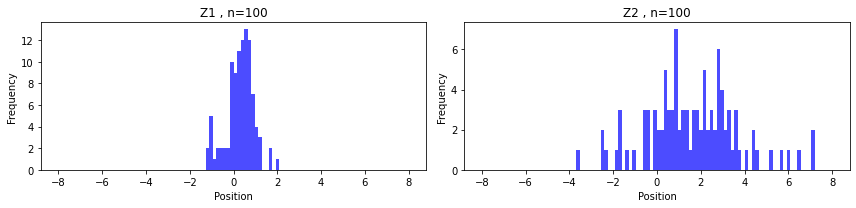

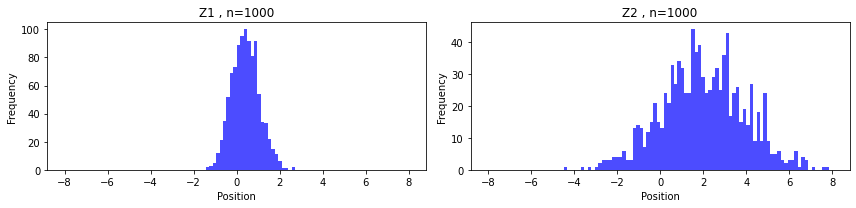

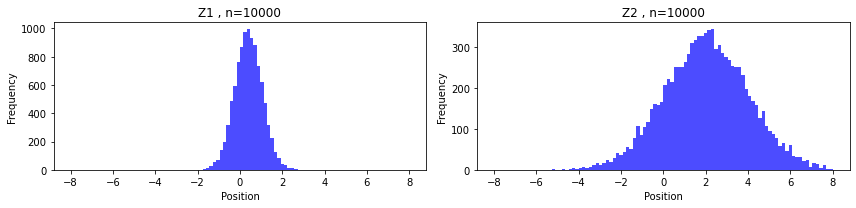

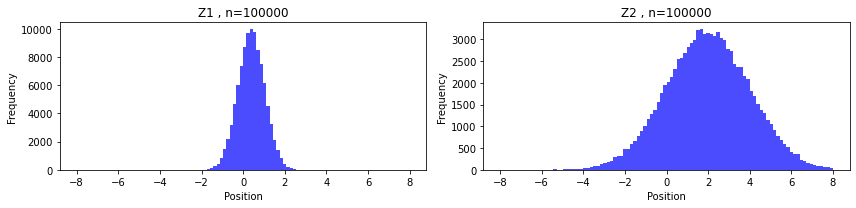

In [85]:
#Plots for new distribution
for i in n:
    sample=plotting(sampling(u_z,sigma_z,i), i)

In [86]:
kappa2=sampling(u_z,sigma_z,n[3])

(iii) Use `matplotlib` to plot histograms of the samples. In particular, plot both the 2D histogram for $z_1, z_2$, as well as the two 1D histograms for $z_1$ and $z_2$.


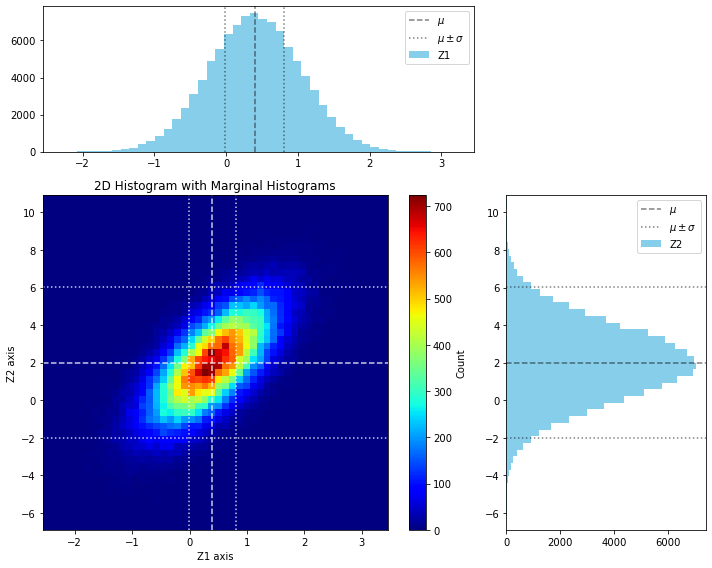

In [87]:
plot2D(kappa2,u_z[0],u_z[1],sigma_z[0][0],sigma_z[1][1])


(iv) Use `matplotlib` to obtain a contour plot from the 2D samples. Overplot it on your 2D historgram and compare.


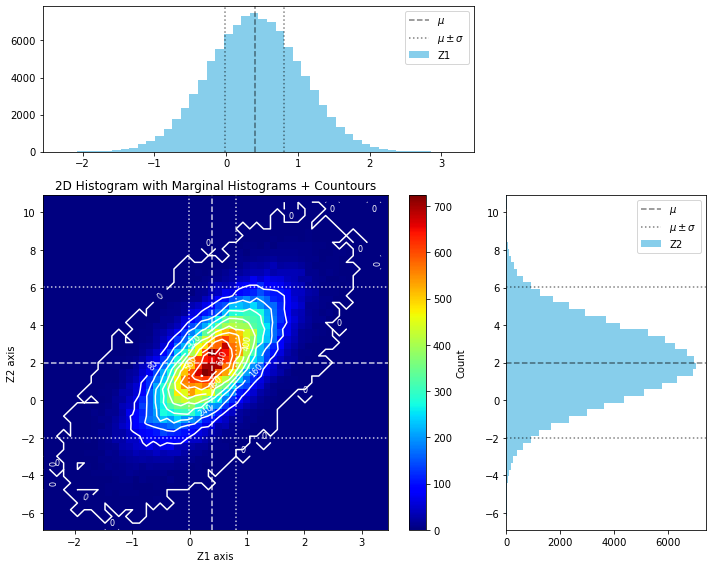

In [90]:
plot2D_andContour(kappa2,u_z[0],u_z[1],sigma_z[0][0],sigma_z[1][1])


(v) Derive an analytic expectation for the 1D histograms of $z_1$ and $z_2$ (what distribution are you plotting in this case?). Compare to your findings above. 


$$\mu_{z_1} = \langle z_1 \rangle = \langle y_1 + 0.2 y_2 \rangle = \langle y_1 \rangle + 0.2 \langle y_2 \rangle = 0.4$$
$$\mu_{z_2} = \langle z_2 \rangle = \langle 0.2 y_1 + y_2 \rangle = 0.2\langle y_1 \rangle + \langle y_2 \rangle = 2$$


In [94]:
# compare with expectation of z1 and z2 samples
np.nanmean(kappa2[:, 0]), np.nanmean(kappa2[:, 1])

(0.4009793196369902, 2.005868194794809)

----------------------------

## Problem 2: The Monty Hall problem (taken from MacKay)

On a game show, a contestant is told the rules as follows:

There are three doors, labeled 1, 2, 3. A single prize has been hidden behind one of them. You get to select one door. Initially your chosen door will not be opened. Instead, the gameshow host will open one of the other two doors, and he will do so in such a way as not to reveal the prize. For example, if you first choose door 1, he will then open one of doors 2 and 3, and it is guaranteed that he will choose which one to open so that the prize will not be revealed.

At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to the other closed door. All the doors will then be opened and you will receive whatever is behind your final choice of door.
Imagine that the contestant chooses door 1 first; then the gameshow host opens door 3, revealing nothing behind the door, as promised. 

Should the contestant 

(i) stick with door 1, 

(ii) switch to door 2, 

(ii) or does it make no difference?

Explain your solution and reasoning.

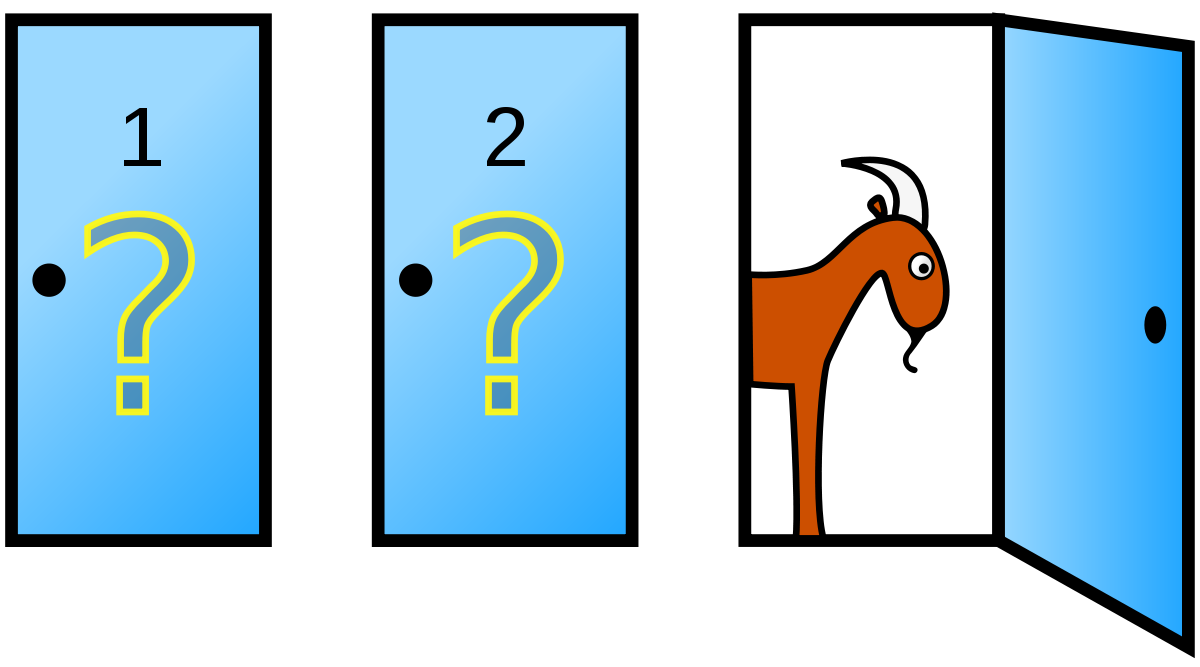

### Solution

Defining the following events:

$\displaystyle A$ = The prize **is** in door 1

$\displaystyle A^{c}$= The prize **is not** in door 1

$\displaystyle B$ = The revealed door 3 contains no prize (always $\displaystyle P( B) \ =1$), independent event.

$\displaystyle C$ = The prize **is** in door 2.


We defined the partition in $\displaystyle \Omega $ defined by $\displaystyle A_{1} \ =\ A,\ A_{2} =A^{c}$. The probabilities are: 

\begin{gather*} 
P( A) \ =\ \frac{1}{3} \ :\ probability\ that\ the\ prize\ \mathbf{is} \ in\ door\ 1.\\
P\left( A^{c}\right) \ =1-P( A) \ =\ \frac{2}{3} \ :\ probability\ that\ the\ prize\ is\ \mathbf{not} \ in\ door\ 1.\\
P( B|A) \ =P\left( B|A^{C}\right) =\ P( B) \ =\ 1\ :\ probability\ that\ the\ revealed\ door\ 3\ contains\ no\ prize. This\ is\ an\ independent\ so\ it\ does\ not\ depend\ on\ A.
\end{gather*}

Using the Baye's theorem, let's calculate the probability of **A happening after B** → $\displaystyle P( A|B)$: 

\begin{align*}
P( A|B) \  & =\ \frac{P( B|A) P( A)}{P( B|A) P( A) \ +\ P\left( B|A^{c}\right) P\left( A^{c}\right)}\\
 & =\ \frac{( 1)( 1/3)}{( 1)( 1/3) +( 1)( 2/3) \ }\\
 & =\ \mathbf{\frac{1}{3}}
\end{align*}

And now, let's calculate the probability of **A not happening after B**→ $\displaystyle P\left( A^{c} |B\right)$: 

\begin{align*}
P\left( A^{c} |B\right) \  & =\ \frac{P\left( B|A^{c}\right) P\left( A^{c}\right)}{P\left( B|A^{c}\right) P\left( A^{c}\right) \ +\ P( B|A) P( A)}\\
 & =\ \frac{( 1)( 2/3)}{( 1)( 2/3) +( 1)( 1/3) \ }\\
 & =\ \mathbf{\frac{2}{3}}
\end{align*}

Because of $\displaystyle P( A|B) \ < \ P\left( A^{c} |B\right)$, this shows that the **best strategy is to switch** to door number 2. 

*Reasoning:* After revealing the door 3 the probability of finding (or not) the prize in door 1 remains **constant**, while the probability of finding the prize in the unchosen and not revealed door 2 **increase**. 
In other words, due to fact that the information about door 3 has been disclosed (*intentionally and not random*), now door 2 has the maximal probability of containing the price, the remaining $2/3$, such that the second axiom holds.

\begin{gather*} 
P(A|B)+P(C|B) = 1 \rightarrow P(C|B) = 1- \frac{1}{3} = \frac{2}{3}
\end{gather*}

 $ $